# Galahad用のJSON作成方法

## インストール方法

rdkit使うのでcondaでインストールします。

```bash
conda install -c rdkit rdkit
conda install -c openbabel openbabel
```

## rdkitやopenbabelを使った分子のJSONの生成の仕方

In [1]:
from galahad_translator import GldMoleculeTranslator, GldMolecule
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole
translator = GldMoleculeTranslator()

In [2]:
# cifファイルを読み込む場合
import pybel
filename = "AMS_DATA.cif"
obmol = next(pybel.readfile('cif', filename))
mol = Chem.MolFromMolBlock(obmol.write('mol'), removeHs=False)
gld_mol = GldMolecule("test",mol)

In [19]:
# smilesを読み込む場合
mol = Chem.MolFromSmiles("CC(O)CCC")
mol = AllChem.AddHs(mol)
AllChem.EmbedMolecule(mol,maxAttempts=200)
gld_mol = GldMolecule("test",mol)

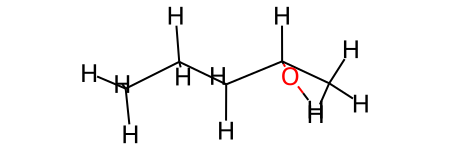

In [20]:
gld_mol.mol

In [21]:
# Galahadとの通信用のJSON
# これをGalahadのMoleculeRepositoryにコピペして使う。
print(translator.dumps(gld_mol))

{"title": "test", "atoms": [{"atomicNumber": 6, "atomIndex": 0, "position": {"x": 2.2966271918225005, "y": -0.08188368632483495, "z": 0.6564735236690268}, "formalCharge": 0}, {"atomicNumber": 6, "atomIndex": 1, "position": {"x": 1.1672949334633829, "y": 0.4450307321147845, "z": -0.16833484306825341}, "formalCharge": 0}, {"atomicNumber": 8, "atomIndex": 2, "position": {"x": 1.361973304227246, "y": 0.09146109258328165, "z": -1.5189513019754965}, "formalCharge": 0}, {"atomicNumber": 6, "atomIndex": 3, "position": {"x": -0.17383532650950248, "y": -0.1068441342651548, "z": 0.25191863634735534}, "formalCharge": 0}, {"atomicNumber": 6, "atomIndex": 4, "position": {"x": -1.3006884511116488, "y": 0.4336246324631927, "z": -0.5885254733879967}, "formalCharge": 0}, {"atomicNumber": 6, "atomIndex": 5, "position": {"x": -2.585416426054509, "y": -0.20928090062416096, "z": -0.05015331410638282}, "formalCharge": 0}, {"atomicNumber": 1, "atomIndex": 6, "position": {"x": 3.0549930688588214, "y": -0.56855

### Galahadとの通信用のサーバーを立てる方法

コンソールから以下のように実行します。

```bash
python structural_optimization_server.py 
```

======== Running on http://0.0.0.0:8080 ========
(Press CTRL+C to quit)


In [12]:
import requests

In [11]:
!pip install requests

In [22]:
# POSTすると分子が登録される
requests.post("http://localhost:8080", {"json": translator.dumps(gld_mol)}).text

'test is registered'

In [23]:
# GETすると分子のJSONが返ってくる
requests.get("http://localhost:8080/move").text

'{"title": "test", "atoms": [{"atomicNumber": 6, "atomIndex": 0, "position": {"x": -1.7884646941841926, "y": 0.08719615027193993, "z": -0.8513037286871282}, "formalCharge": 0}, {"atomicNumber": 6, "atomIndex": 1, "position": {"x": -1.2143658525034624, "y": -0.36170158260983004, "z": 0.4509370929210709}, "formalCharge": 0}, {"atomicNumber": 8, "atomIndex": 2, "position": {"x": -2.0813763955197295, "y": -0.0009887956537154472, "z": 1.4762137877756474}, "formalCharge": 0}, {"atomicNumber": 6, "atomIndex": 3, "position": {"x": 0.14224156204691094, "y": 0.24639244707359567, "z": 0.7167836965340966}, "formalCharge": 0}, {"atomicNumber": 6, "atomIndex": 4, "position": {"x": 1.0623222997576016, "y": -0.18411487256566242, "z": -0.4062582346002101}, "formalCharge": 0}, {"atomicNumber": 6, "atomIndex": 5, "position": {"x": 2.4518271032929446, "y": 0.3663232391267578, "z": -0.24592989789987205}, "formalCharge": 0}, {"atomicNumber": 1, "atomIndex": 6, "position": {"x": -1.3305927912812407, "y": -0.